## Observations and Insights 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [16]:
# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice.
combine_data["Mouse ID"].nunique()

249

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# combine_data.duplicated(subset = ["Mouse ID", "Timepoint"])
combine_duplicate = combine_data.loc[combine_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"]
combine_duplicate

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_data.loc[combine_data["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data[combine_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Groupby Drug Regimen
drug_data = clean_data.groupby(["Drug Regimen"])

# Mean Tumor Volume
average_drug_data = drug_data["Tumor Volume (mm3)"].mean()

# Median Tumor Volume
median_drug_data = drug_data["Tumor Volume (mm3)"].median()

# Variance Tumor Volume
var_drug_data = drug_data["Tumor Volume (mm3)"].var()

# Standard Deviation Tumor Volume
std_drug_data = drug_data["Tumor Volume (mm3)"].std()

# SEM Tumor Volume
sem_drug_data = drug_data["Tumor Volume (mm3)"].sem()

# Summary Dataframe
drug_analysis = pd.DataFrame({"Tumor Volume Mean (mm3)":average_drug_data,
                              "Tumor Volume Median (mm3)":median_drug_data,
                              "Tumor Volume Variance (mm3)":var_drug_data, 
                              "Tumor Volume Standard Deviation (mm3)":std_drug_data, 
                              "Tumor Volume SEM (mm3)":sem_drug_data})
drug_analysis

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Standard Deviation (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby(["Drug Regimen"]).agg({})

""


## Bar and Pie Charts

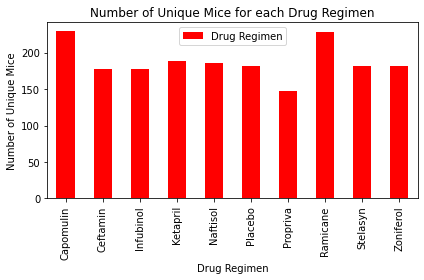

In [24]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Create Dataframe for count of mice for each regimen
drug_mice_count = pd.DataFrame(drug_data["Drug Regimen"].count())

# Create Bar chart
mice_bar_chart = drug_mice_count.plot(kind='bar', title="Number of Unique Mice for each Drug Regimen", color="red")

# Set the xlabel and ylabel using class methods
mice_bar_chart.set_xlabel("Drug Regimen")
mice_bar_chart.set_ylabel("Number of Unique Mice")
plt.tight_layout()

# Save the chart
plt.savefig("Charts/PandaBarChart.png")

plt.show()

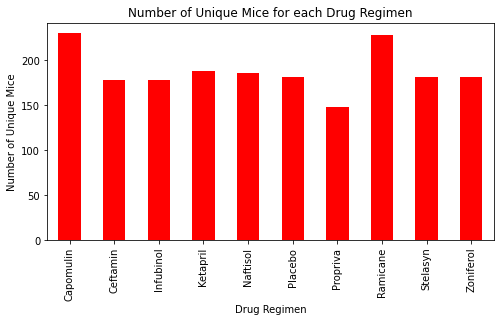

In [25]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(drug_mice_count))
tick_locations = [value for value in x_axis]

 # Create bar chart
plt.figure(figsize=(8,4))
plt.bar(x_axis, drug_mice_count["Drug Regimen"], color='red', align="center", width = 0.5)
plt.xticks(tick_locations, list(drug_mice_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(drug_mice_count["Drug Regimen"])*1.05)

# Create a Title and labels
plt.title("Number of Unique Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")

# Save the Chart and Show
plt.savefig("Charts/PyplotBarChart.png")

plt.show()

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Groupby Sex
gender = clean_data.groupby("Sex")

# Create Dataframe counting gender
gender_count = pd.DataFrame(gender["Mouse ID"].nunique())
gender_count

,Mouse ID
Sex,
Female,123
Male,125


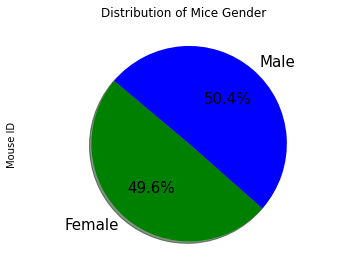

In [27]:
# Create a Pie Chart
gender_count.plot(kind="pie", subplots = True, title="Distribution of Mice Gender", startangle=140, 
                  autopct='%1.1f%%', shadow=True, fontsize=15, colors =["green","blue"], legend =False)

# Set axis
plt.axis("equal")

# Save the Chart and Show
plt.savefig("Charts/PandaPieChart.png")

plt.show()

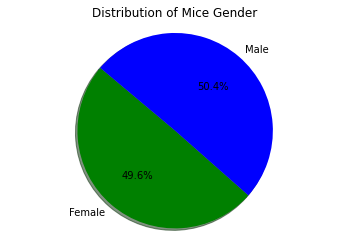

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get Labels
labels = list(gender_count.index.values)

# Values of the pie chart
values = gender_count["Mouse ID"]

# The colors of each section of the pie chart
colors = ["green", "blue"]

# Create Pie Chart
plt.pie(values, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create a Title
plt.axis("equal")
plt.title("Distribution of Mice Gender")

# Save the Chart and Show
plt.savefig("Charts/PyplotPieChart.png")

plt.show()


## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
clean_mouse_id = clean_data.groupby(["Mouse ID"])
last_timepoint = clean_mouse_id["Timepoint"].max()
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_volume = pd.merge(last_timepoint, clean_data, how="outer", on="Timepoint")
last_tumor_volume.set_index(["Mouse ID"])

,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,45,Ramicane,Male,21,16,22.050126,1
s185,45,Capomulin,Female,3,17,23.343598,1
x401,45,Capomulin,Female,16,15,28.484033,0
m601,45,Capomulin,Male,22,17,28.430964,1
g791,45,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...
y769,20,Ceftamin,Female,6,27,55.025724,2
y865,20,Ceftamin,Male,23,26,52.361982,1
z581,20,Infubinol,Female,24,25,51.807944,2


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = last_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
